In [1]:
import pymongo

In [2]:
from pymongo import MongoClient

In [3]:
connection = MongoClient('localhost', 27017)

In [4]:
db = connection.smart_hospital

In [5]:
data = db.liver

In [6]:
dblist = data.find()

In [7]:
dblist

In [8]:
import pandas as pd
df = pd.DataFrame(list(data.find()))

In [9]:
df.shape

(583, 12)

In [10]:
df.drop(['_id'],axis =1,inplace = True)

In [11]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dataset', ylabel='count'>

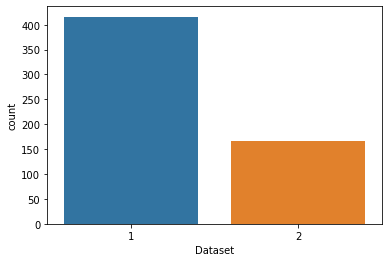

In [15]:
sns.countplot(df['Dataset'])

In [16]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [17]:
df['Albumin_and_Globulin_Ratio'].median()

0.93

In [18]:
df = df.fillna(df['Albumin_and_Globulin_Ratio'].median())

In [19]:
df.Dataset.value_counts(1)*100

1    71.35506
2    28.64494
Name: Dataset, dtype: float64

In [20]:
cat_features = df.select_dtypes(include=[np.object])
cat_features.dtypes

Gender    object
dtype: object

In [21]:
df['Gender'] = df['Gender'].replace(('Male','Female'),(0,1))

In [22]:
df.Dataset

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [23]:
df['Dataset'] = df['Dataset'].replace((1,2),(0,1))

In [24]:
corr_matrix = abs(df.corr())
print(corr_matrix["Dataset"].sort_values(ascending=False).head(10))

Dataset                       1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Albumin_and_Globulin_Ratio    0.162144
Albumin                       0.161388
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Gender                        0.082416
Name: Dataset, dtype: float64


In [25]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [26]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,0
582,38,0,1.0,0.3,216,21,24,7.3,4.4,1.50,1


In [27]:
df.drop('Gender',axis=1,inplace=True)

In [28]:
X = df.drop(['Dataset'],axis=1)
y = df['Dataset']

In [29]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X,y)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(832, 9)
(832,)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_resample_scaled = scaler.fit_transform(x_resample)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resample_scaled,y_resample,test_size=0.3,random_state=45)

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
!pip install lightgbm


  Using cached lightgbm-3.2.0-py3-none-win_amd64.whl (1.0 MB)


In [34]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

LGBMClassifier()

In [35]:
print("Training Accuracy :", lgb.score(X_train, y_train))
print("Testing Accuracy :", lgb.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.828


In [36]:
from sklearn.model_selection import RandomizedSearchCV
params={
    "n_estimators":[300,350,450,500,800],
"max_depth" : [150,200,240,260,280],
"learning_rate" : [0.1,0.01,0.001,0.05,0.005],
"num_leaves":[30,40,50,60,70,80,90]}


random_search = RandomizedSearchCV (estimator = lgb,param_distributions=params,n_iter
=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_resample_scaled,y_resample)

print('score: {:.4}, with best C: {}'.format(random_search.best_score_,random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
score: 0.7767, with best C: {'num_leaves': 60, 'n_estimators': 500, 'max_depth': 280, 'learning_rate': 0.1}


In [37]:
print("Training Accuracy :", random_search.score(X_train, y_train))
print("Testing Accuracy :", random_search.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [38]:
params = random_search.best_params_
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(**params,random_state=45)
lgb.fit(X_train,y_train)

LGBMClassifier(max_depth=280, n_estimators=500, num_leaves=60, random_state=45)

In [39]:
print("Training Accuracy :", lgb.score(X_train, y_train))
print("Testing Accuracy :", lgb.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.832


In [40]:
import pickle
filename = 'liver_model.pkl'
pickle.dump(random_search, open(filename, 'wb'))

In [41]:
model = open("liver_model.pkl","rb")
model = pickle.load(model)

In [42]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [43]:
sample_input = ['31','1.3','0.5','184','29','32','6.8','3.4','1.00']
scaled = scaler.transform([sample_input])

In [44]:
model.predict(scaled)

array([0], dtype=int64)